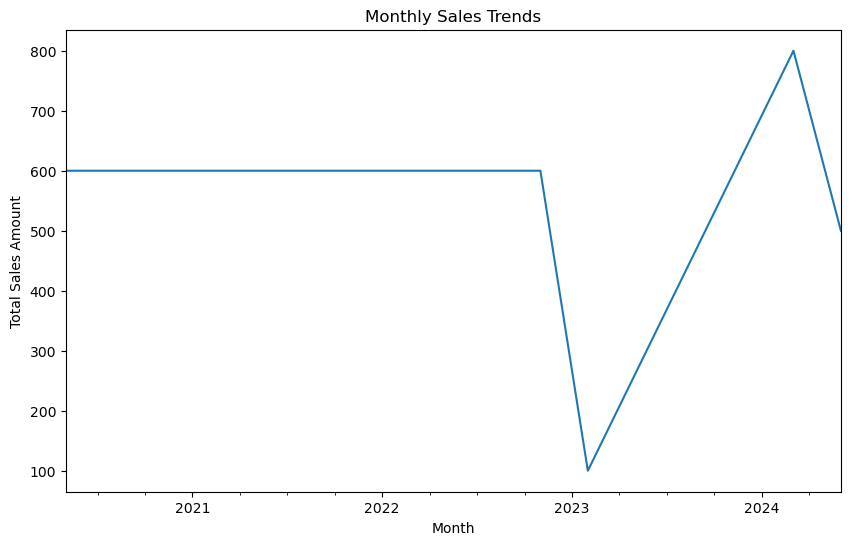

Mean Sales Amount: 520.0
Median Sales Amount: 600.0
Total Sales Amount: 2600
Top Selling Product Category: Electronics
Peak Sales Month: 2024-03


In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Data Collection and Exploration with SQL
sales_data = pd.read_csv(r"C:\Users\User\Downloads\Book1.csv")
conn = sqlite3.connect(":memory:")
sales_data.to_sql("sales_table", conn, if_exists="replace", index=False)

# Querying the table structure, preview of data, and total sales separately
query_structure = "PRAGMA table_info(sales_table);"
query_preview = "SELECT * FROM sales_table LIMIT 5;"
query_total_sales = "SELECT SUM(Amount) AS TotalSales FROM sales_table;"

structure = pd.read_sql(query_structure, conn)
preview = pd.read_sql(query_preview, conn)
total_sales = pd.read_sql(query_total_sales, conn)

# Step 2: Data Analysis with Python
mean_sales = sales_data['Amount'].mean()
median_sales = sales_data['Amount'].median()
sales_data['SalesDate'] = pd.to_datetime(sales_data['SalesDate'])
monthly_sales = sales_data.groupby(sales_data['SalesDate'].dt.to_period('M'))['Amount'].sum()

# Step 3: Visualization
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.show()

# Step 4: Insights
sales_by_category = sales_data.groupby('ProductCategory')['Amount'].sum()
top_selling_product = sales_by_category.idxmax()
peak_sales_month = monthly_sales.idxmax()

# Step 5: Conclusion and Documentation
print("Mean Sales Amount:", mean_sales)
print("Median Sales Amount:", median_sales)
if not total_sales.empty:
    print("Total Sales Amount:", total_sales.iloc[0]['TotalSales'])
else:
    print("Total Sales Amount: No data available")
print("Top Selling Product Category:", top_selling_product)
print("Peak Sales Month:", peak_sales_month)
